Contributions made by each of the team members is uploaded to the github directory.
**Please refer to the link:**
https://github.com/atarun121/Image-Classifier/blob/main/team_members_Contributions.txt

### **Initialization and Importing of modules and other dependencies**

In [10]:
#importing important modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import zipfile
import tensorflow as tf

from google.colab import files
from shutil import  copyfile
from keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Downloading the data**

In [11]:
# Loading the Data or Downloading the Data.
# Using Google Colab for reading or loading the Data.

!wget --no-check-certificate \
    "https://github.com/atarun121/Image-Classifier/blob/main/kagglecatsanddogs_5340.zip?raw=True" \
    -O "/tmp/PetImages.zip"



--2023-10-04 17:19:09--  https://github.com/atarun121/Image-Classifier/blob/main/kagglecatsanddogs_5340.zip?raw=True
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/atarun121/Image-Classifier/raw/main/kagglecatsanddogs_5340.zip [following]
--2023-10-04 17:19:09--  https://github.com/atarun121/Image-Classifier/raw/main/kagglecatsanddogs_5340.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/atarun121/Image-Classifier/main/kagglecatsanddogs_5340.zip [following]
--2023-10-04 17:19:10--  https://media.githubusercontent.com/media/atarun121/Image-Classifier/main/kagglecatsanddogs_5340.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubus

### **Processing the Data**

In [13]:
# Processing the zip file of the Data
local_zip = "/tmp/PetImages.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

In [14]:
# Finding the total number of Cats and Dogs images in the directory.
# Total number of Cats.
print(f"Total number of Cats is {len(os.listdir('/tmp/PetImages/Cat/'))}")
# Total number of Dogs.
print(f"Total number of Dogs is {len(os.listdir('/tmp/PetImages/Dog/'))}")

Total number of Cats is 12501
Total number of Dogs is 12501


In [15]:
# Using os.mkdir to create new directories
# Creating new directories for training and validation
try:
  os.mkdir("/tmp/kagglecatsanddogs_5340")
  os.mkdir("/tmp/kagglecatsanddogs_5340/training")
  os.mkdir("/tmp/kagglecatsanddogs_5340/validation")
  os.mkdir("/tmp/kagglecatsanddogs_5340/training/Cats")
  os.mkdir("/tmp/kagglecatsanddogs_5340/training/Dogs")
  os.mkdir("/tmp/kagglecatsanddogs_5340/validation/Cats")
  os.mkdir("/tmp/kagglecatsanddogs_5340/validation/Dogs")
except OSError:
  pass

### **Splitting the Data into Training and Validation**

In [16]:
import shutil
def split_data(SOURCE, TRAINING, VALIDATION, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file) > 0:
      files.append(filename)
    else:
      print(filename, "is zero length, so ignoring!")

  training_length = int(len(files) * SPLIT_SIZE)
  validation_length = int(len(files) - training_length)
  shuffled_set = random.sample(files, len(files))
  training_set = shuffled_set[0:training_length]
  validation_set = shuffled_set[0:validation_length]

  for filename in training_set:
    this_file = SOURCE + filename
    destination = TRAINING + filename
    shutil.copyfile(this_file, destination)

  for filename in validation_set:
    this_file = SOURCE + filename
    destination = VALIDATION + filename
    shutil.copyfile(this_file, destination)


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CAT_DIR = "/tmp/kagglecatsanddogs_5340/training/Cats/"
VALIDATION_CAT_DIR = "/tmp/kagglecatsanddogs_5340/validation/Cats/"

DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOG_DIR = "/tmp/kagglecatsanddogs_5340/training/Dogs/"
VALIDATION_DOG_DIR = "/tmp/kagglecatsanddogs_5340/validation/Dogs/"

SPLIT_SIZE = 0.9

split_data(CAT_SOURCE_DIR, TRAINING_CAT_DIR, VALIDATION_CAT_DIR, SPLIT_SIZE)
split_data(DOG_SOURCE_DIR, TRAINING_DOG_DIR, VALIDATION_DOG_DIR, SPLIT_SIZE)

666.jpg is zero length, so ignoring!
11702.jpg is zero length, so ignoring!


In [17]:
# Total number of images in Training
print(f"Total number of training Cats is {len(os.listdir('/tmp/kagglecatsanddogs_5340/training/Cats/'))}")
print(f"Total number of training Dogs is {len(os.listdir('/tmp/kagglecatsanddogs_5340/training/Dogs/'))}")

# Total number of images in Validation
print(f"Total number of validation Cats is {len(os.listdir('/tmp/kagglecatsanddogs_5340/validation/Cats/'))}")
print(f"Total number of validation Dogs is {len(os.listdir('/tmp/kagglecatsanddogs_5340/validation/Dogs/'))}")

Total number of training Cats is 11250
Total number of training Dogs is 11250
Total number of validation Cats is 1250
Total number of validation Dogs is 1250


### **Creating new Directories**

In [18]:
# Directory with training cats images
train_cats_dir = os.path.join("/tmp/kagglecatsanddogs_5340/training/Cats")

# Directory with the kagglecatsanddogs_5340 images.
train_dogs_dir = os.path.join("/tmp/kagglecatsanddogs_5340/training/Dogs")

# Directory with validation cats images
validation_cats_dir = os.path.join("/tmp/kagglecatsanddogs_5340/validation/Cats")

# Directory with valkagglecatsanddogs_5340 images
validation_dogs_dir = os.path.join("/tmp/kagglecatsanddogs_5340/validation/Dogs")

In [19]:
# Training Cat directory
train_cat_names = os.listdir(train_cats_dir)
print(train_cat_names[:10])

# Training Dog directory
train_dog_names = os.listdir(train_dogs_dir)
print(train_dog_names[:10])

# Validation Cat directory
validation_cat_names = os.listdir(validation_cats_dir)
print(validation_cat_names[:10])

# Validation Dog directory
validation_dog_names = os.listdir(validation_dogs_dir)
print(validation_dog_names[:10])


['3402.jpg', '11614.jpg', '10225.jpg', '6145.jpg', '9881.jpg', '9700.jpg', '869.jpg', '7463.jpg', '9958.jpg', '7981.jpg']
['4227.jpg', '3402.jpg', '11171.jpg', '11614.jpg', '10225.jpg', '6145.jpg', '9881.jpg', '9700.jpg', '869.jpg', '7463.jpg']
['4151.jpg', '10343.jpg', '1212.jpg', '4111.jpg', '4703.jpg', '171.jpg', '8471.jpg', '9804.jpg', '12426.jpg', '5121.jpg']
['3402.jpg', '11614.jpg', '6145.jpg', '7463.jpg', '5584.jpg', '3548.jpg', '10258.jpg', '8461.jpg', '10110.jpg', '765.jpg']


### **Data Visualisation**

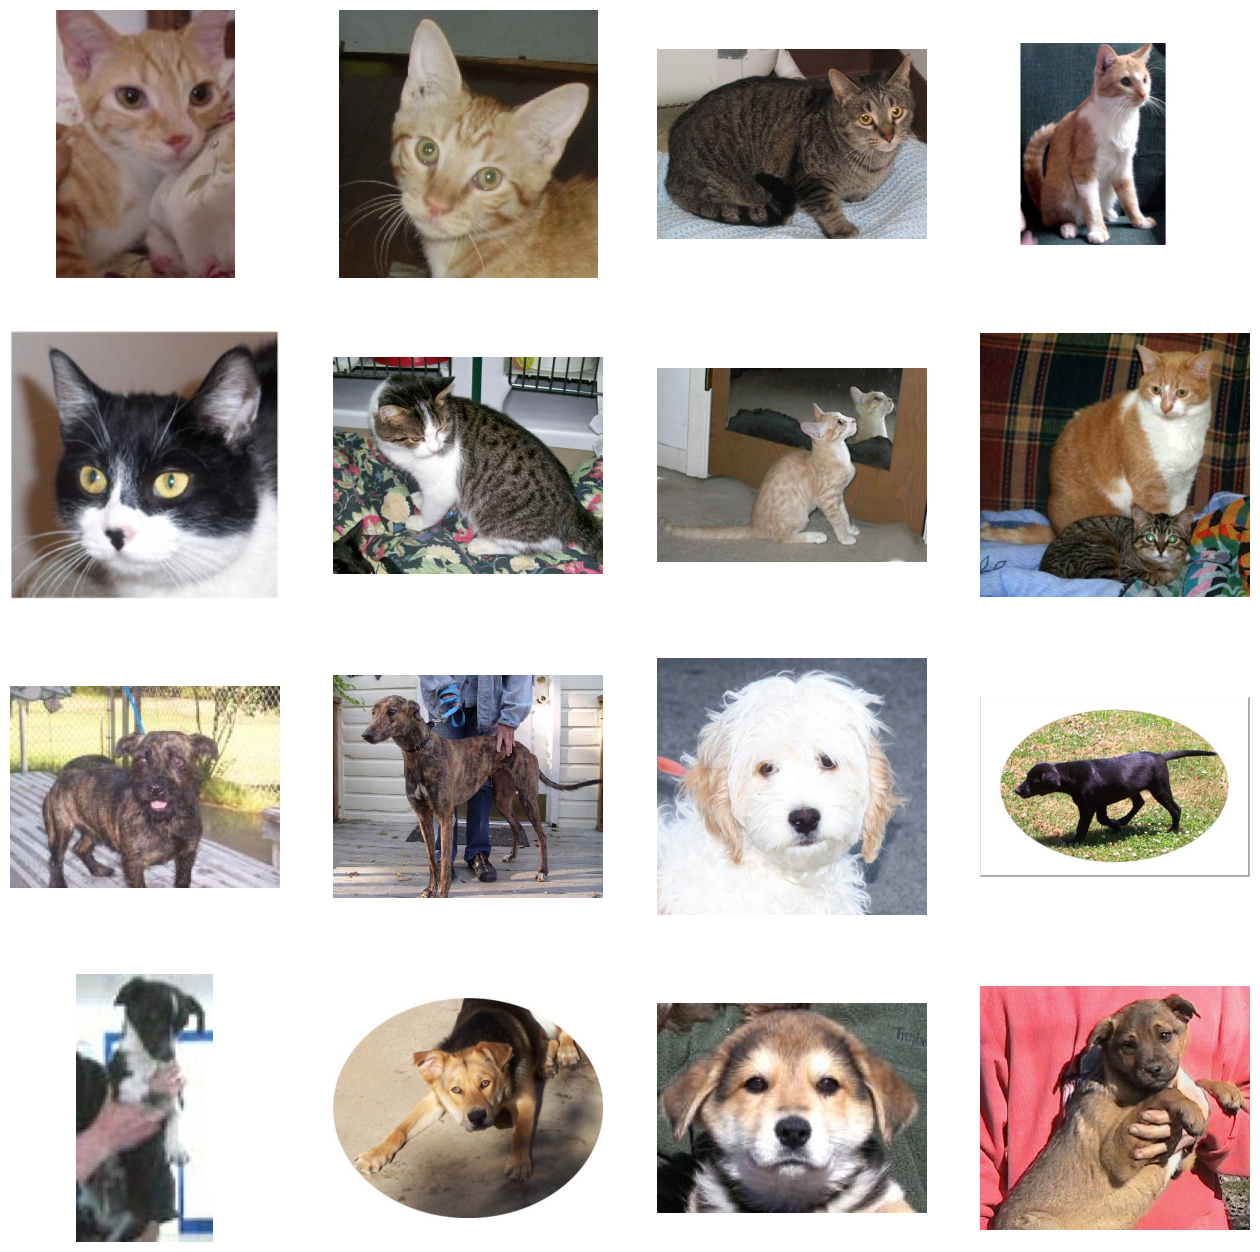

In [20]:
# Parameters for our graph
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Setup matplotlib figure
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8
next_cat_px = [os.path.join(train_cats_dir, fname) for fname in train_cat_names[pic_index-8:pic_index]]
next_dog_px = [os.path.join(train_dogs_dir, fname) for fname in train_dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_px + next_dog_px):
  # Set subplots
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis("Off")

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### **Convolutional Neural Network**


*   Building Convolutional Neural Network from scratch using Tensorflow and Keras API.
*   Since it is a two class Classification problem i.e a Binary Classfication problem, I will use sigmoid activation so that the output of my network will be a single scalar between 0 and 1, encoding the probability of the images.



In [21]:
# Building Convolutional Neural Network from scratch
model = tf.keras.models.Sequential([
                                    # The first convolution
                                    # Input image has 3 bytes color
                                    tf.keras.layers.Conv2D(16, (3, 3), activation="relu", input_shape=(300, 300, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The second convolution
                                    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The third convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fourth convolution
                                    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The fifth convolution
                                    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # The sixth convolution
                                    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    # Flatten the results to feed in Deep Neural Network
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation="relu"),
                                    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [22]:
# Summary of Neural Network
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [23]:
# Compile the Model
from tensorflow.keras.optimizers import RMSprop

model.compile(loss="binary_crossentropy",
              optimizer=RMSprop(learning_rate=0.001),
              metrics=["accuracy"])

### **Data Processing**

In [24]:
# Normalizing all the images
# All images are rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode="nearest")

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "/tmp/kagglecatsanddogs_5340/training",
    target_size=(300, 300),
    batch_size=64,
    class_mode="binary"
)

# Flow validation images in batches of 32 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    "/tmp/kagglecatsanddogs_5340/validation",
    target_size=(300, 300),
    batch_size=32,
    class_mode="binary"
)


Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


### **Training the Model**

In [25]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=50,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=8
)

Epoch 1/50
8/8 [==============================] - 72s 9s/step - loss: 0.7003 - accuracy: 0.4961 - val_loss: 0.6928 - val_accuracy: 0.5156
Epoch 2/50
8/8 [==============================] - 71s 9s/step - loss: 0.6931 - accuracy: 0.5098 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 3/50
8/8 [==============================] - 71s 9s/step - loss: 0.6928 - accuracy: 0.5293 - val_loss: 0.6944 - val_accuracy: 0.4688
Epoch 4/50
8/8 [==============================] - 79s 10s/step - loss: 0.6944 - accuracy: 0.4727 - val_loss: 0.6943 - val_accuracy: 0.4648
Epoch 5/50
8/8 [==============================] - 72s 9s/step - loss: 0.6934 - accuracy: 0.5020 - val_loss: 0.6926 - val_accuracy: 0.5430
Epoch 6/50
8/8 [==============================] - 72s 9s/step - loss: 0.6920 - accuracy: 0.5293 - val_loss: 0.6919 - val_accuracy: 0.4766
Epoch 7/50
8/8 [==============================] - 79s 10s/step - loss: 0.7067 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.4922
Epoch 8/50
8/8 [================

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


8/8 [==============================] - 72s 9s/step - loss: 0.6676 - accuracy: 0.5859 - val_loss: 0.7162 - val_accuracy: 0.5312
Epoch 37/50
8/8 [==============================] - 70s 9s/step - loss: 0.6552 - accuracy: 0.6133 - val_loss: 0.6773 - val_accuracy: 0.5898
Epoch 38/50
8/8 [==============================] - 69s 9s/step - loss: 0.6239 - accuracy: 0.6738 - val_loss: 0.7606 - val_accuracy: 0.5117
Epoch 39/50
8/8 [==============================] - 69s 8s/step - loss: 0.6658 - accuracy: 0.6183 - val_loss: 0.6362 - val_accuracy: 0.6602
Epoch 40/50
8/8 [==============================] - 78s 10s/step - loss: 0.6729 - accuracy: 0.5898 - val_loss: 0.6233 - val_accuracy: 0.6875
Epoch 41/50
8/8 [==============================] - 72s 9s/step - loss: 0.6486 - accuracy: 0.6445 - val_loss: 0.6188 - val_accuracy: 0.6680
Epoch 42/50
8/8 [==============================] - 72s 9s/step - loss: 0.6483 - accuracy: 0.6172 - val_loss: 0.6151 - val_accuracy: 0.6992
Epoch 43/50
8/8 [=====================

### **Model Visualisation**

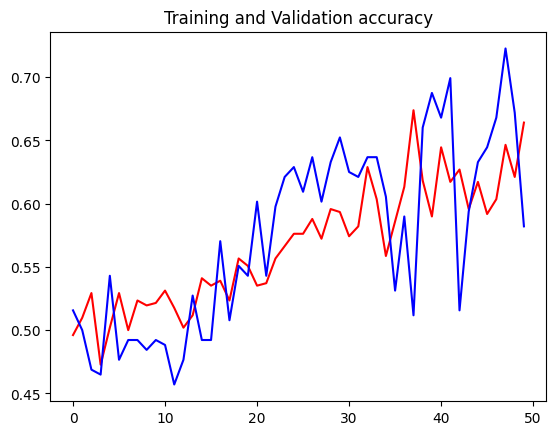

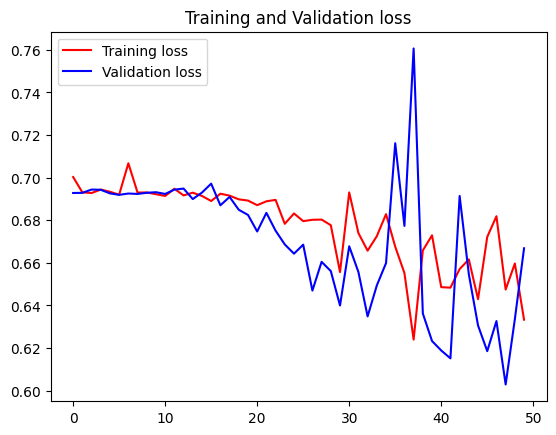

In [26]:
# Plotting loss vs accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and Validation accuracy")

plt.figure()

plt.plot(epochs, loss, "r", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and Validation loss")

plt.legend()
plt.show()

### **Model in Production**

In [30]:
# Model in production
# Using google colab file system
uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting Images
  path = "/content/" + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn, "is a Dog")
  else:
    print(fn, "is a Cat")

Saving 9952.jpg to 9952.jpg
1/1 [==============================] - 0s 65ms/step
[1.]
9952.jpg is a Dog


Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable.
Here, I have entered 9952.img which is an image of a dog.